# Using the AtomicEmbeddings package
This notebook will serve as a tutorial for using the AtomicEmbeddings package and going over the core features.

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns

from AtomicEmbeddings.core import Embedding

sns.set(font_scale=1.5)

## Elemental representations

A key problem in supervised machine learning problems is determining the featurisation/representation scheme for a material in order to pass it through a mathematical algorithm. For composition only machine learning, we want to be able create a numerical representation of a chemical formula A<sub>w</sub>B<sub>x</sub>C<sub>y</sub>D<sub>z</sub>. We can achieve this by creating a composition based feature vector derived from the elemental properties of the constituent atoms or a representation can be learned during the supervised training process.

A few of these CBFV have been included in the package and we can load them using the `load_data` class method.


In [2]:
# Create a list of the available CBFVs included in the package

cbfvs = [
    "magpie",
    "mat2vec",
    "matscholar",
    "megnet16",
    "oliynyk",
    "random_200",
    "skipatom",
    "mod_petti",
    "magpie_sc",
    "oliynyk_sc",
]

# Create a dictionary of {cbfv name : Atomic_Embeddings objects} key, value pairs
AtomEmbeds = {cbfv: Embedding.load_data(cbfv) for cbfv in cbfvs}

Taking the magpie representation as our example, we will demonstrate some features of the the `Embedding` class.

In [3]:
# Let's use magpie as our example

# Let's look at the CBFV of hydrogen for the magpie representation
print(
    "Below is the CBFV/representation of the hydrogen atom from the magpie data we have \n"
)
print(AtomEmbeds["magpie"].embeddings["H"])

Below is the CBFV/representation of the hydrogen atom from the magpie data we have 

[ 92.        1.00794  14.01      1.        1.       31.        2.2
   1.        0.        0.        0.        1.        1.        0.
   0.        0.        1.        6.615     7.853     0.      194.     ]


In [4]:
embeddings_array = np.array(list(AtomEmbeds["magpie_sc"].embeddings.values()))
embeddings_array.std()

1.0

In [5]:
embeddings_array = np.array(list(AtomEmbeds["megnet16"].embeddings.values()))
embeddings_array.mean()

0.01185038880043488

We can check the elements which have a feature vector for a particular embedding

In [6]:
# We can also check to see what elements have a CBFV for our chosen representation
print("Magpie has composition-based feature vectors for the following elements: \n")
print(AtomEmbeds["magpie"].element_list)

Magpie has composition-based feature vectors for the following elements: 

['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk']


For the elemental representations distributed with the package, we also included BibTex citations of the original papers were these representations are derived from. This is accessible through the `.citation()` method.

In [7]:
# Print the bibtex citation for the magpie embedding
print(AtomEmbeds["magpie"].citation())

['@article{ward2016general,title={A general-purpose machine learning framework for predicting properties of inorganic materials},author={Ward, Logan and Agrawal, Ankit and Choudhary, Alok and Wolverton, Christopher},journal={npj Computational Materials},volume={2},number={1},pages={1--7},year={2016},publisher={Nature Publishing Group}}']


We can also check the dimensionality of the elemental representation.

In [8]:
# We can quickly check the dimensionality of this CBFV
magpie_dim = AtomEmbeds["magpie"].dim
print(f"The magpie CBFV has a dimensionality of {magpie_dim}")

The magpie CBFV has a dimensionality of 21


In [9]:
# Let's find the dimensionality of all of the CBFVs that we have loaded


AtomEmbeds_dim = {cbfv: [AtomEmbeds[cbfv].dim] for cbfv in cbfvs}

dim_df = pd.DataFrame.from_dict(AtomEmbeds_dim, orient="index", columns=["dimension"])
print(dim_df)

            dimension
magpie             21
mat2vec           199
matscholar        200
megnet16           16
oliynyk            44
random_200        200
skipatom          200
mod_petti           1
magpie_sc          22
oliynyk_sc         44


We can see a wide range of dimensions of the composition-based feature vectors.

Let's know explore more of the core features of the package.
The numerical representation of the elements enables us to quantify the differences between atoms. With these embedding features, we can explore how similar to atoms are by using a 'distance' metric. Atoms with distances close to zero are 'similar', whereas elements which have a large distance between them should in theory be dissimilar. 

Using the class method `compute_distance_metric`, we can compute these distances.

In [10]:
# Let's continue using our magpie cbfv
# The package contains some default distance metrics: euclidean, manhattan, chebyshev

metrics = ["euclidean", "manhattan", "chebyshev", "wasserstein", "energy"]

distances = [
    AtomEmbeds["magpie"].compute_distance_metric("Li", "K", metric=metric)
    for metric in metrics
]
print("For the magpie representation:")
for i, distance in enumerate(distances):
    print(
        f"Using the metric {metrics[i]}, the distance between Li and K is {distance:.2f}"
    )

For the magpie representation:
Using the metric euclidean, the distance between Li and K is 153.58
Using the metric manhattan, the distance between Li and K is 284.99
Using the metric chebyshev, the distance between Li and K is 117.16
Using the metric wasserstein, the distance between Li and K is 13.57
Using the metric energy, the distance between Li and K is 1.23


In [11]:
# Let's continue using our magpie cbfv
# The package contains some default distance metrics: euclidean, manhattan, chebyshev

metrics = ["euclidean", "manhattan", "chebyshev", "wasserstein", "energy"]

distances = [
    AtomEmbeds["magpie_sc"].compute_distance_metric("Li", "K", metric=metric)
    for metric in metrics
]
print("For the scaled magpie representation:")
for i, distance in enumerate(distances):
    print(
        f"Using the metric {metrics[i]}, the distance between Li and K is {distance:.2f}"
    )

For the scaled magpie representation:
Using the metric euclidean, the distance between Li and K is 4.09
Using the metric manhattan, the distance between Li and K is 7.87
Using the metric chebyshev, the distance between Li and K is 3.39
Using the metric wasserstein, the distance between Li and K is 0.32
Using the metric energy, the distance between Li and K is 0.23


## Plotting
We can also explore the correlation between embedding vectors.
In the example below, we will plot a heatmap of the pearson correlation of our magpie CBFV, a scaled magpie CBFV and the 16-dim megnet embeddings

### Pearson Correlation plots

#### Unscaled and scaled Magpie

<AxesSubplot: xlabel='mend_2', ylabel='mend_1'>

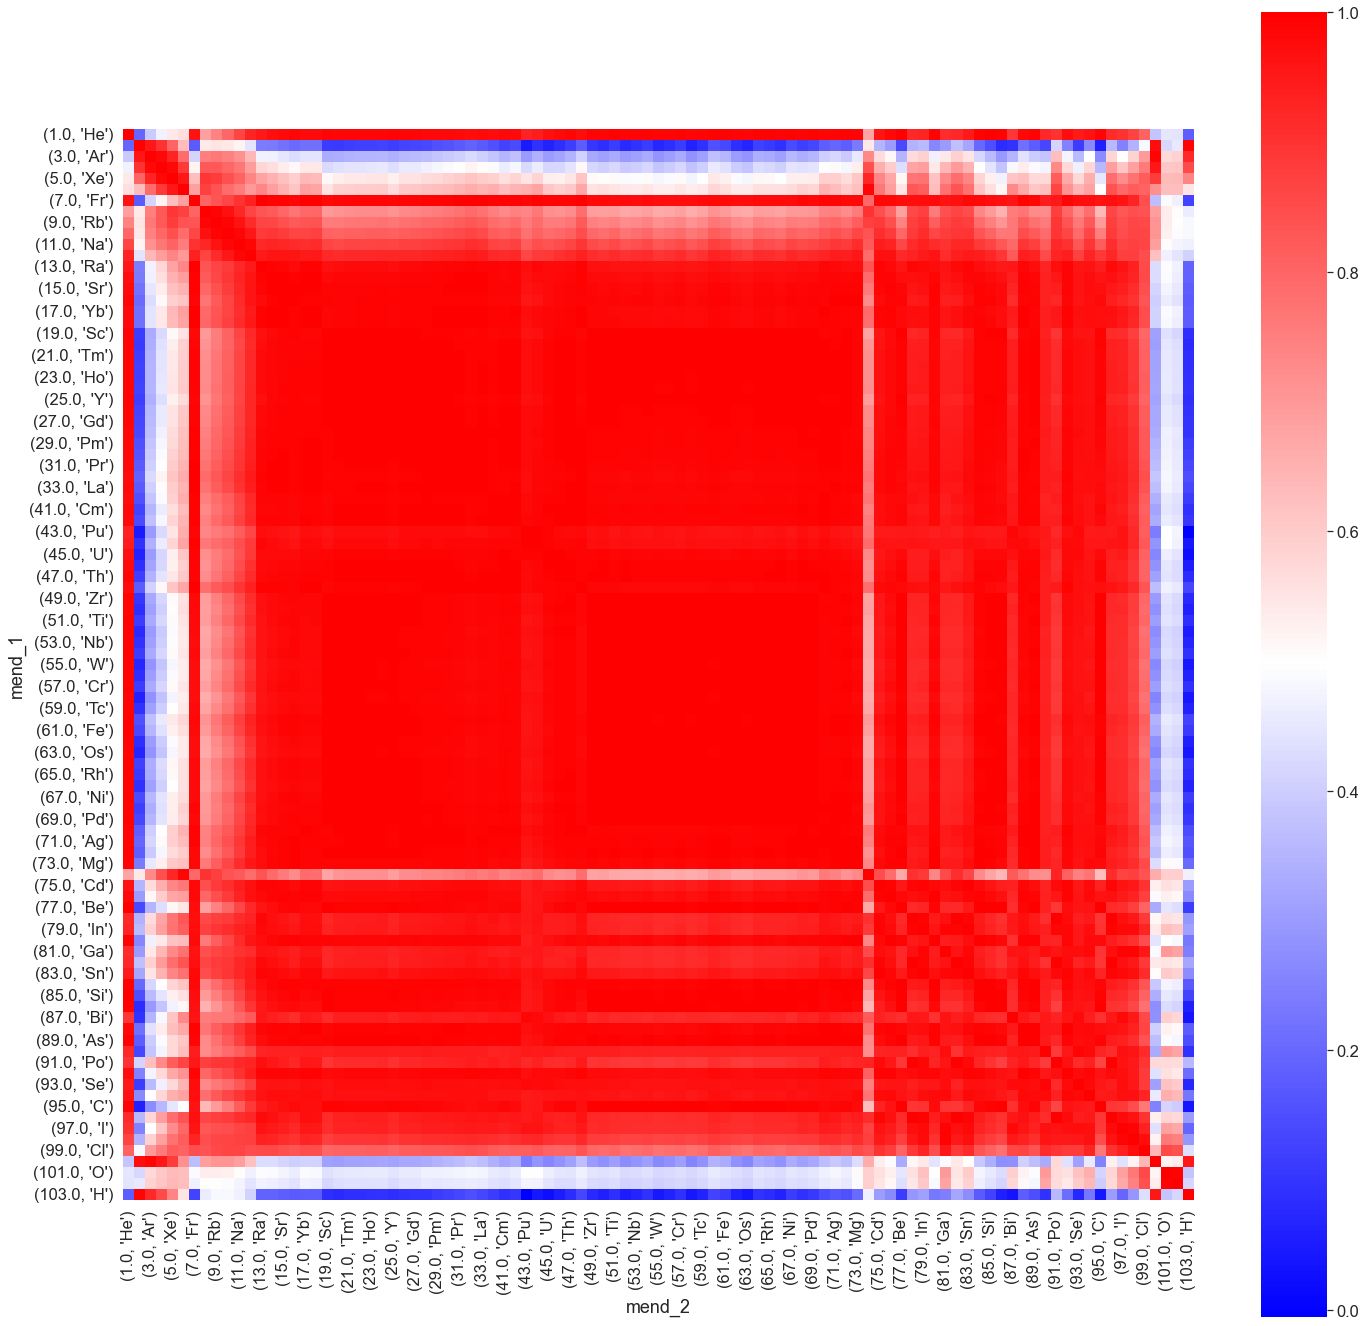

In [12]:
AtomEmbeds["magpie"].plot_pearson_correlation()

<AxesSubplot: xlabel='mend_2', ylabel='mend_1'>

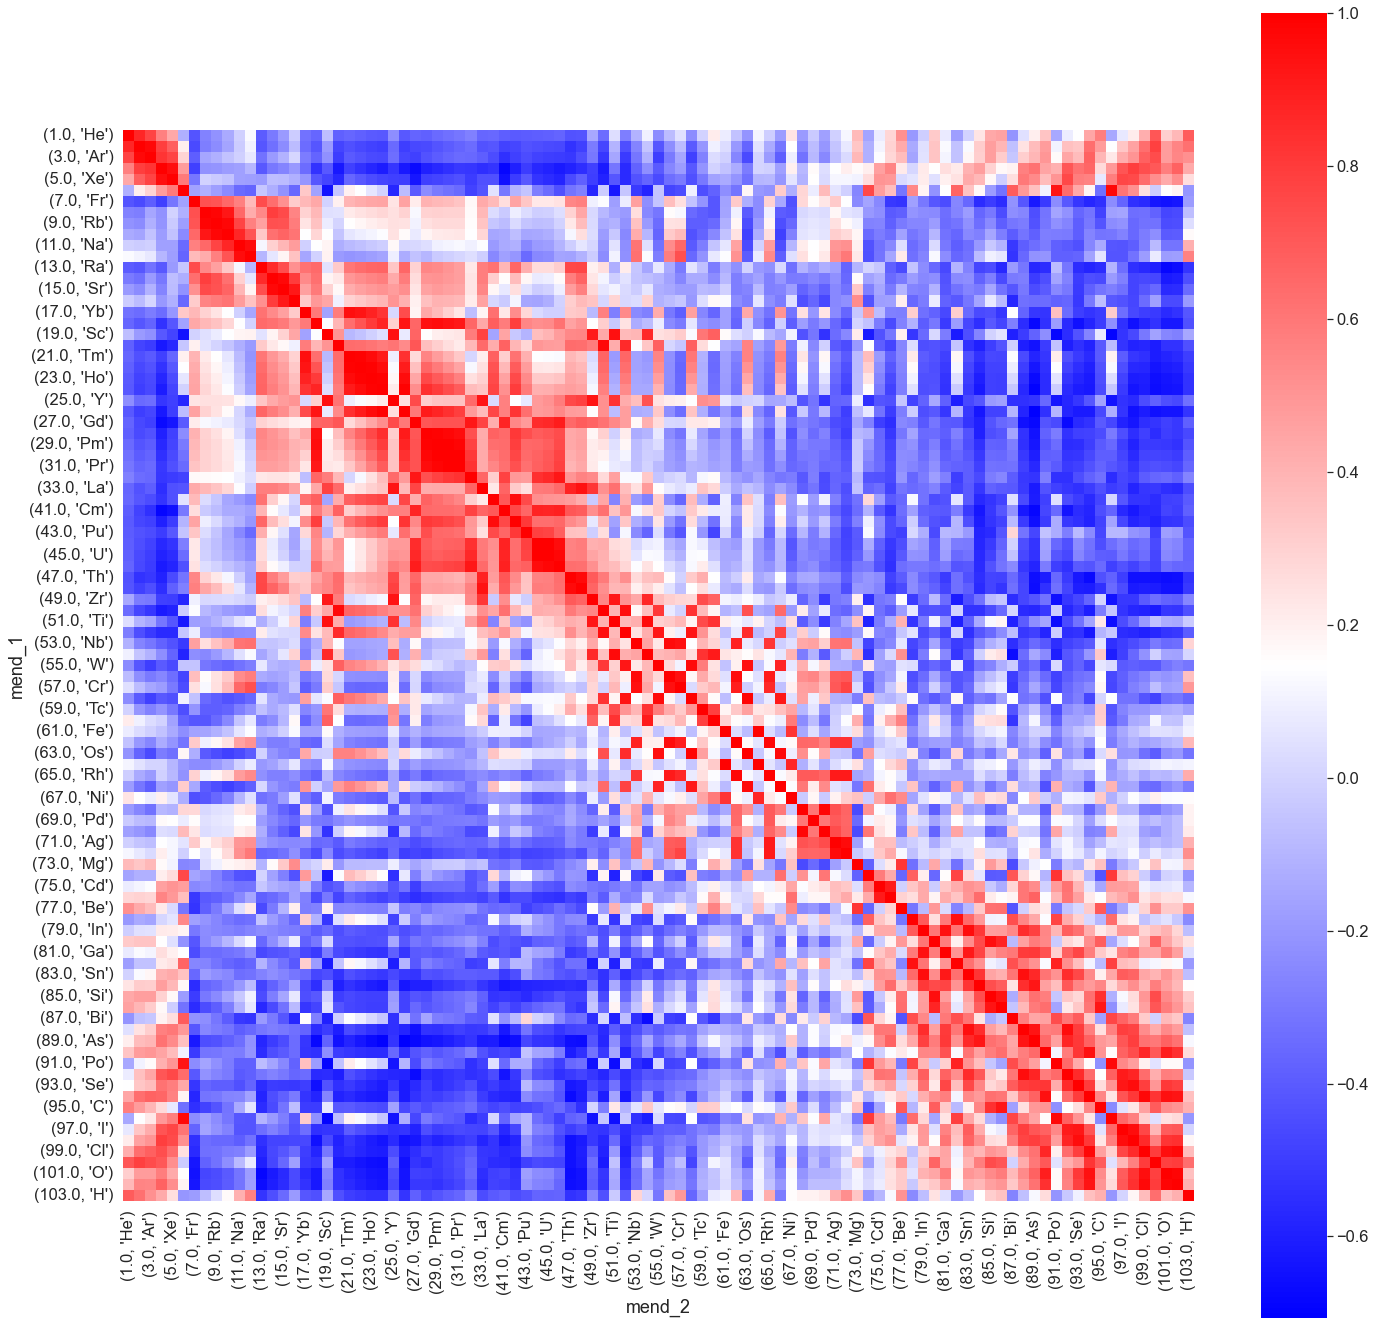

In [13]:
AtomEmbeds["magpie_sc"].plot_pearson_correlation()

As we can see from the above pearson correlation heatmaps, the visualisation of the correlations across the atomic embeddings is sensitive to the components of the embedding vectors. The unscaled magpie representation produces a plot which makes qualitative assessment of chemical trends difficult, whereas with the scaled representation it is possible to perform some qualitative analysis on the (dis)similarity of elements based on their feature vector.

<AxesSubplot: xlabel='mend_2', ylabel='mend_1'>

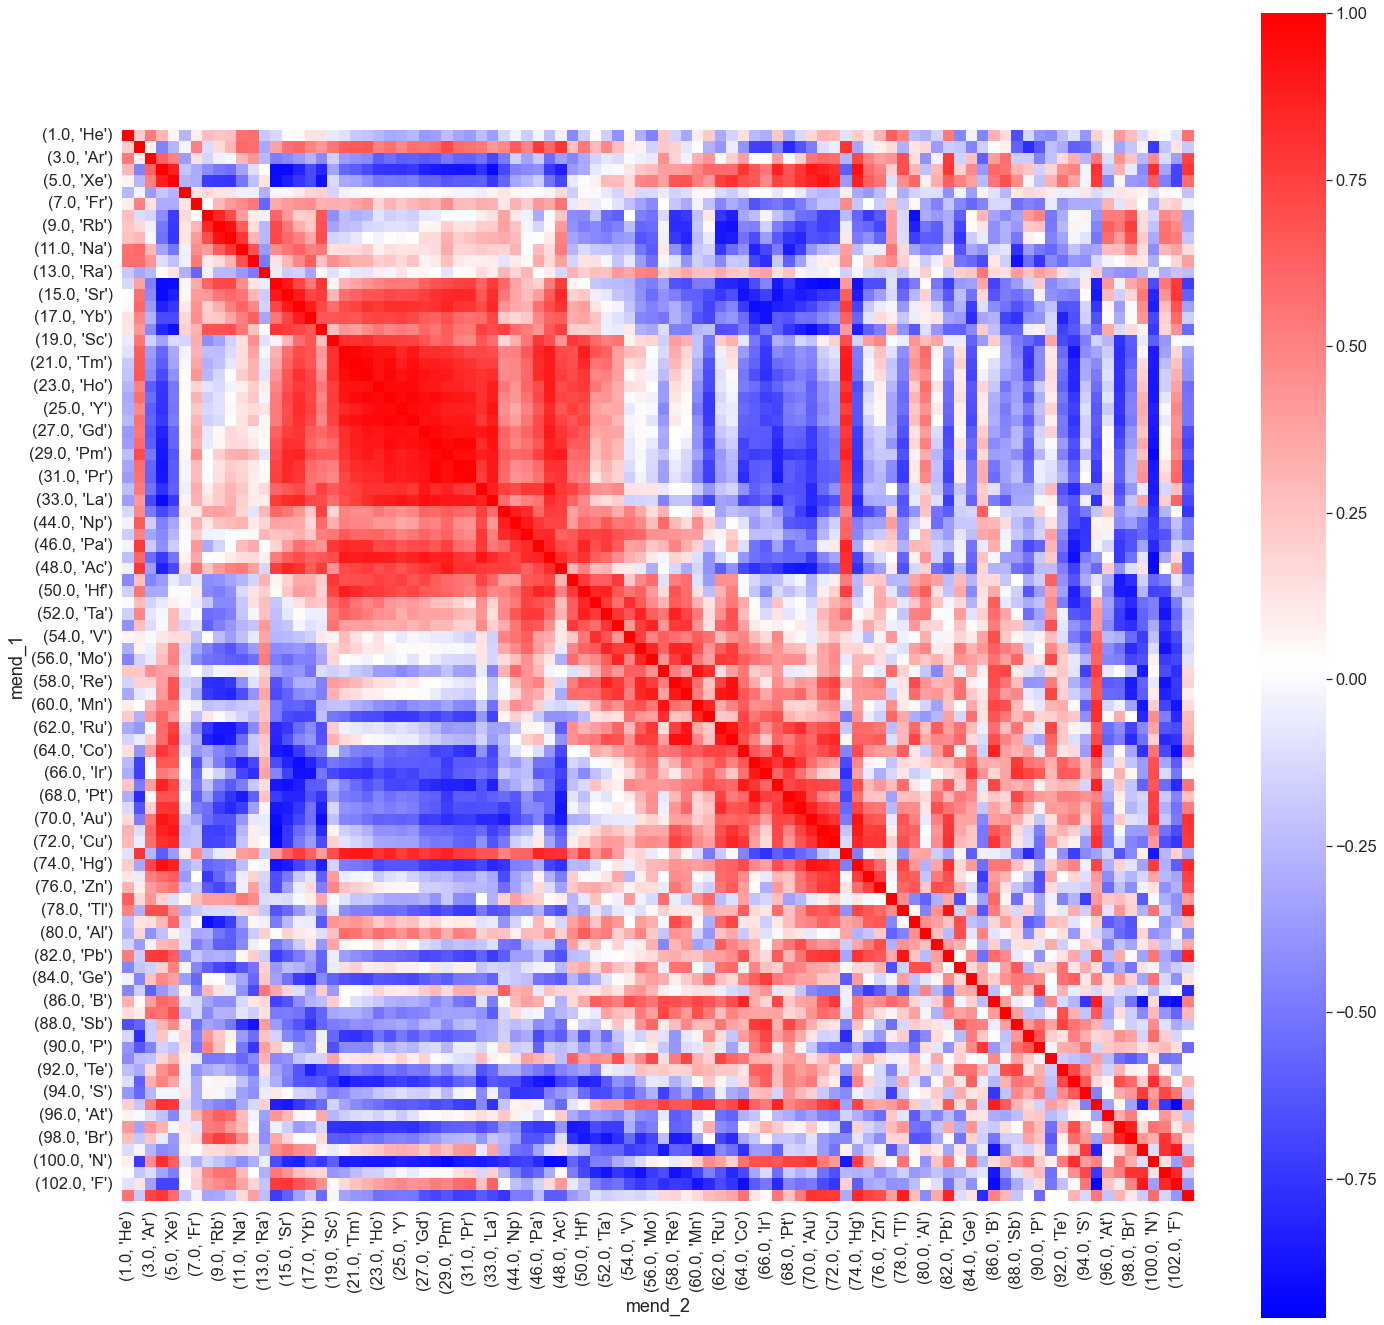

In [14]:
AtomEmbeds["megnet16"].plot_pearson_correlation()

### PCA plots

<module 'matplotlib.pyplot' from '/Users/aonwu/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

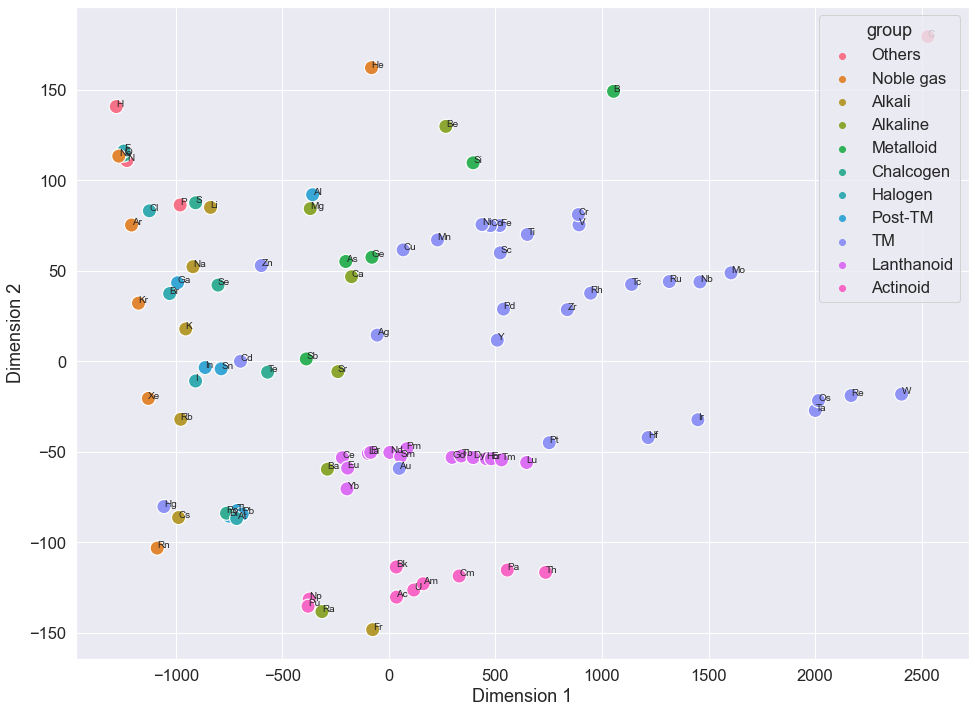

In [15]:
AtomEmbeds["magpie"].plot_PCA_2D()

<module 'matplotlib.pyplot' from '/Users/aonwu/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

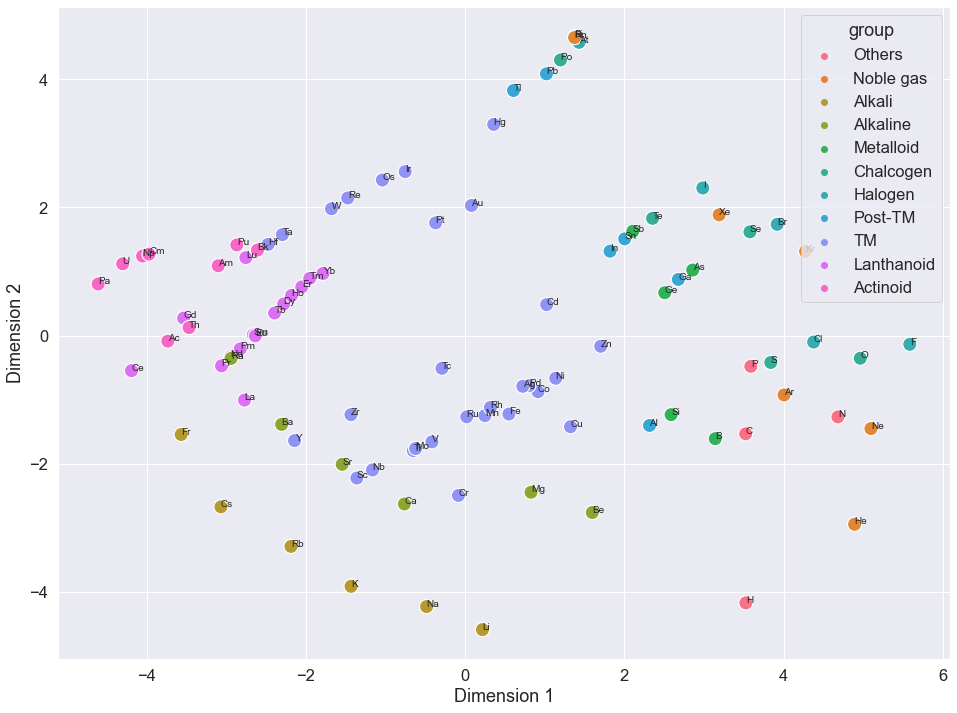

In [16]:
AtomEmbeds["magpie_sc"].plot_PCA_2D()

<module 'matplotlib.pyplot' from '/Users/aonwu/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

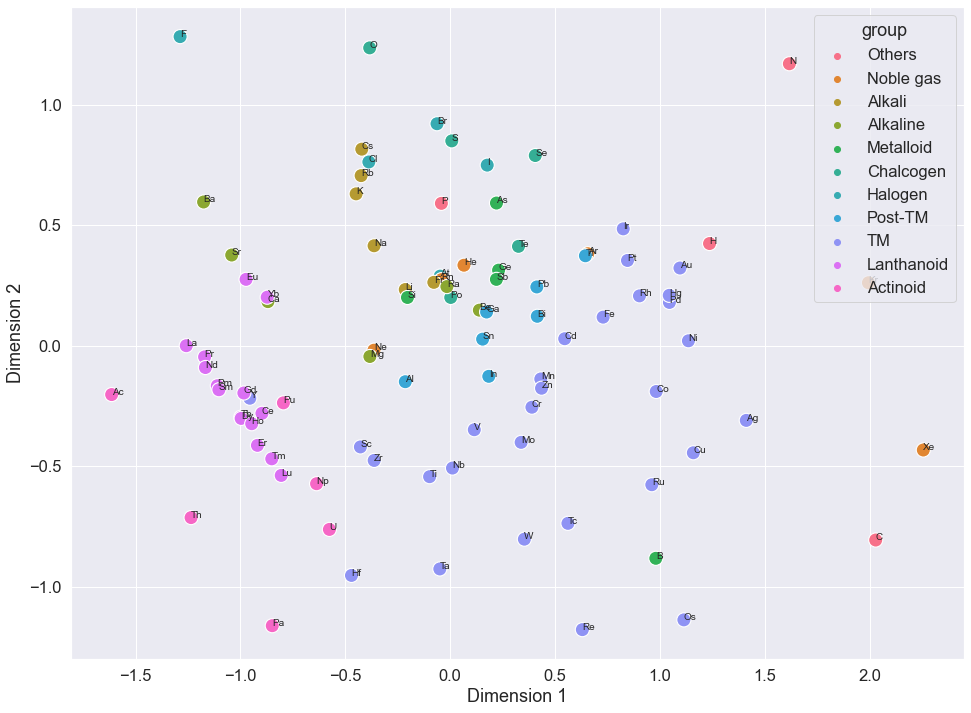

In [17]:
AtomEmbeds["megnet16"].plot_PCA_2D()

### t-SNE plots

/Users/aonwu/.conda/envs/atomic_test/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/aonwu/.conda/envs/atomic_test/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<module 'matplotlib.pyplot' from '/Users/aonwu/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

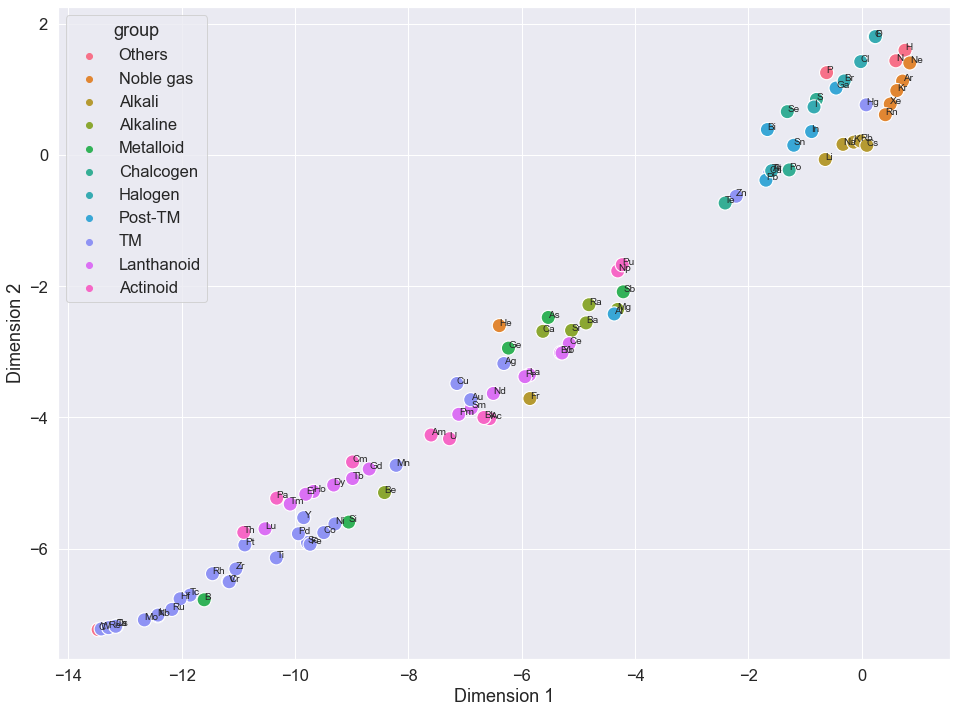

In [18]:
AtomEmbeds["magpie"].plot_tSNE()

/Users/aonwu/.conda/envs/atomic_test/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/aonwu/.conda/envs/atomic_test/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<module 'matplotlib.pyplot' from '/Users/aonwu/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

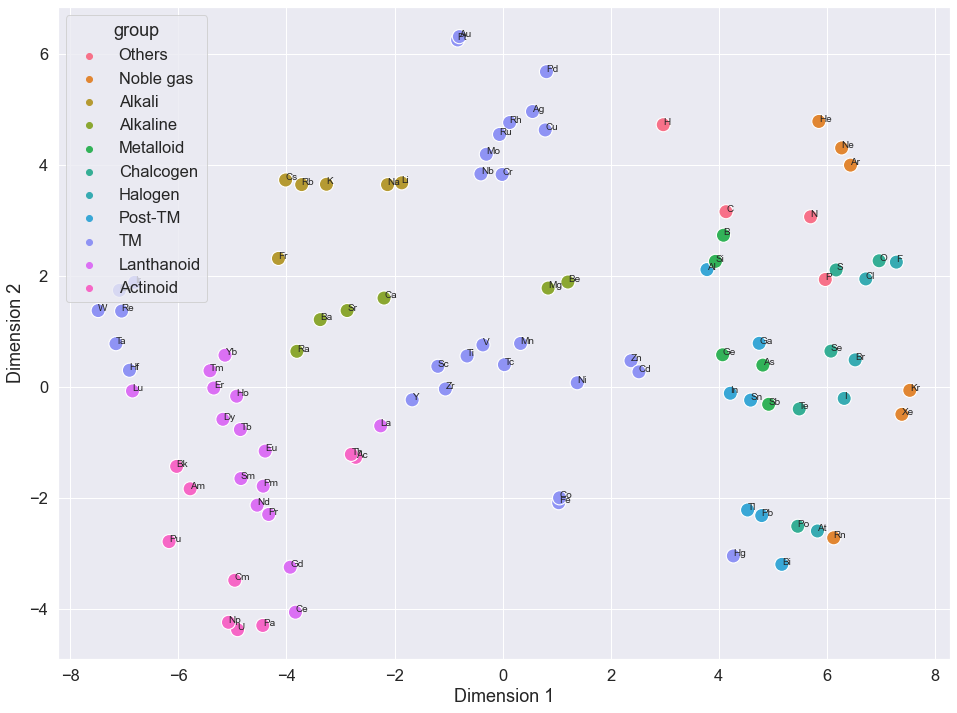

In [19]:
AtomEmbeds["magpie_sc"].plot_tSNE()

/Users/aonwu/.conda/envs/atomic_test/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/aonwu/.conda/envs/atomic_test/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<module 'matplotlib.pyplot' from '/Users/aonwu/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

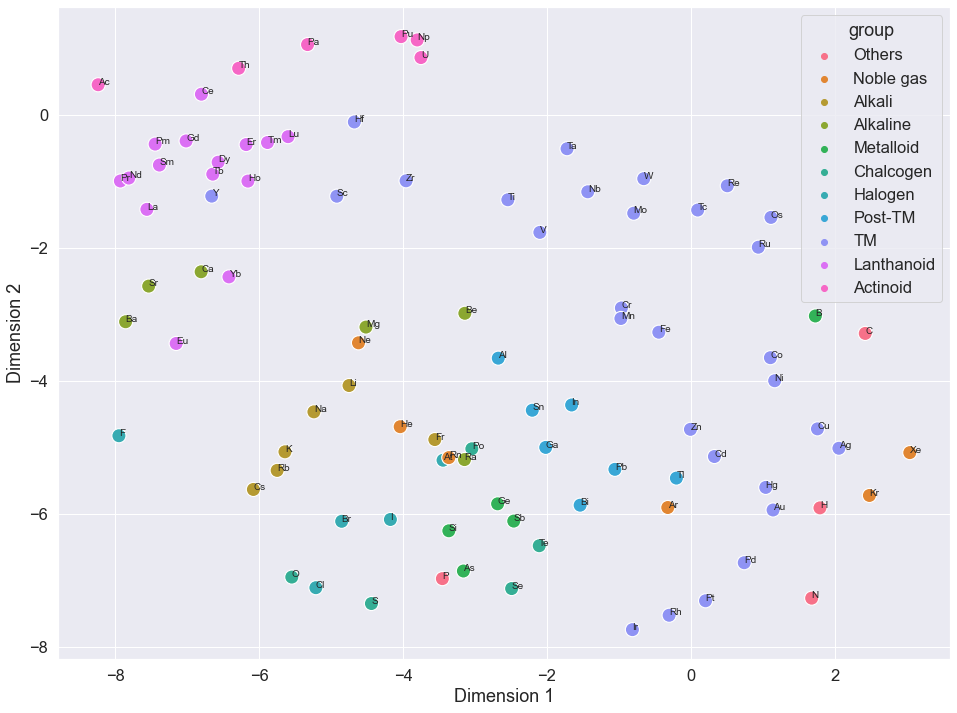

In [20]:
AtomEmbeds["megnet16"].plot_tSNE()